In [434]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from sklearn import tree
from anytree import Node, RenderTree
import random
import math
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import nltk
from nltk import bigrams

In [435]:
sms = pd.read_csv('SmsCollection.csv', delimiter = '    ')
sms.head()

C:\Users\tessa\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,label,text
0,ham,Go until jurong point
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf


In [436]:
# sns.countplot(x = "label", data = sms)

# print(1 - sms.label.mean())

In [437]:
def transform_categorical(df):
    
    df['label'] = df['label'].map({'ham': 0, 'spam': 1}).astype(int)
    
transform_categorical(sms)

sms.head()

,label,text
0,0,Go until jurong point
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,Nah I don't think he goes to usf


In [438]:
sms['text'] = sms['text'].fillna('none')
sms['text'] = sms['text'].str.replace('[^\w\s]','')
sms['text'] = sms['text'].str.lower()

smsspam = sms[sms['label'] == 1]
smsham = sms[sms['label'] == 0]
wordsspam = pd.Series(' '.join(smsspam['text']).lower().split()).value_counts()[:100]
wordsham = pd.Series(' '.join(smsham['text']).lower().split()).value_counts()[:1000]

# print(wordsham)

typicalspamwords = []
for word in wordsspam.index:
    if word not in wordsham.index:
        typicalspamwords.append(word)
        
typicalhamwords = []
for word in wordsham.index[:100]:
    if word not in wordsspam.index:
        typicalhamwords.append(word)
        
print(len(typicalspamwords))
print(len(typicalhamwords))

30
60


In [439]:
# print(sms.head())
# sms["bigrams"] = sms["text"]
# print(spam_bigram)

# string = "I really like python, it's pretty awesome."
# string_bigrams = list(bigrams(string.split(" ")))
# print(string_bigrams)

In [440]:
# def predict_spam_words(df, spamwords):
    
#     df["Pred"] = 0
    
#     for i in range(len(df)):
#         if any(spamword in df['text'].iloc[i] for spamword in spamwords):
#                df["Pred"].iloc[i] = 1

    
# predict_spam_words(sms, typicalspamwords)


# print(sms.head())

# sns.countplot(x = 'Pred', data = sms)
# # if any(word in 'some one long two phrase three' for word in list_):

In [441]:
# def check_prediction(df):
    
#     cors = np.where(df["label"] == df["Pred"], 1, 0)
#     print(sum(cors))
    
#     falsepos = np.where((df["label"] == 0) & (df["Pred"] == 1), 1, 0)
#     falseneg = np.where((df["label"] == 1) & (df["Pred"] == 0), 1, 0)

#     print(sum(falsepos))
#     print(sum(falseneg))
# #     df = df.drop('Correct')
#     return sum(cors), sum(falsepos), sum(falseneg)

# cor = check_prediction(sms)
# print(cor[0]/len(sms))


In [442]:
def count_word_types(df, spamwords, hamwords):
    
    df["Spamwords"] = 0
    df["Hamwords"] = 0

    for word in spamwords:
        df["Spamwords"] = df["Spamwords"] + df['text'].str.count(word)
        
    for word in hamwords:
        df["Hamwords"] = df["Hamwords"] + df['text'].str.count(word)
        
count_word_types(sms, typicalspamwords, typicalhamwords)

print(sms['Hamwords'].max())

189


In [443]:
def hamgroups(df):
    
    labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    df["Hamwords"] = pd.qcut(df["Hamwords"], 10, labels = labels)

# def spamgroups(df):
    
#     df["Spamwords"] = np.where(df["Spamwords"] > 4, 4, df["Spamwords"])
    
hamgroups(sms)
# spamgroups(sms)
print(sms.head())

   label                                               text  Spamwords  \
0      0                              go until jurong point          0   
1      0                            ok lar joking wif u oni          0   
2      1  free entry in 2 a wkly comp to win fa cup fina...          5   
3      0        u dun say so early hor u c already then say          0   
4      0                    nah i dont think he goes to usf          0   

  Hamwords  
0        2  
1        2  
2        7  
3        4  
4        4  


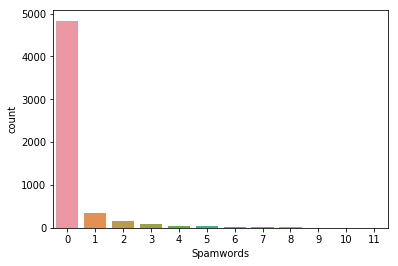

In [444]:
sns.countplot(x = "Spamwords",  data = sms)

In [445]:
g = sms.groupby(["Spamwords"])
print(g.label.mean())

Spamwords
0     0.038477
1     0.510204
2     0.940120
3     0.987500
4     1.000000
5     1.000000
6     1.000000
7     1.000000
8     1.000000
9     1.000000
10    1.000000
11    1.000000
Name: label, dtype: float64


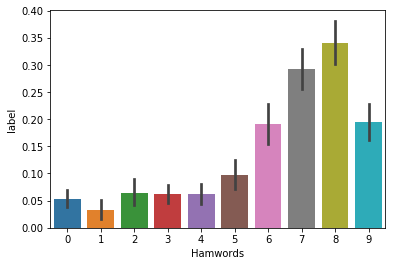

In [446]:
sns.barplot(x = "Hamwords", y = "label", data = sms)

In [447]:
def drop_attributes(df):
    df = df.drop(['text'], axis = 1)
    return df
    
sms = drop_attributes(sms)
sms.tail()

,label,Spamwords,Hamwords
5569,1,4,6
5570,0,0,4
5571,0,0,0
5572,0,0,8
5573,0,0,3


In [448]:
xsms = sms.drop(['label', 'Hamwords'], axis = 1)
ysms = sms['label']

In [449]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(xsms, ysms)
Y_pred = decision_tree.predict(xsms)
# print(decision_tree)
print(Y_pred)
acc_decision_tree = round(decision_tree.score(xsms, ysms) * 100, 2)
print(acc_decision_tree)

[0 0 1 ... 0 0 0]
93.45


In [450]:
logreg = LogisticRegression()
logreg.fit(xsms, ysms)
Y_pred = logreg.predict(xsms)
acc_log = round(logreg.score(xsms, ysms) * 100, 2)
acc_log

C:\Users\tessa\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


93.33

In [451]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(xsms, ysms)
Y_pred = gaussian.predict(xsms)
acc_gaussian = round(gaussian.score(xsms, ysms) * 100, 2)
acc_gaussian

93.45